##### <img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>



# Challenge S5: Liga de Fútbol Profesional

## Objetivos

El objetivo de este challenge es simular mediante el método de montecarlo el resultado de la liga 2018-2019.

Para ello, utilizando las distribuciones de probabilidad, y todos los conceptos previos que hemos aprendido realizaremos una simulación lo más realista posible.

## Configuración del entorno

In [19]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Carga de datos

Para este challenge dispones de varias fuentes de datos que puedes utilizar:

* `equipos_liga_2018-19.txt` Fichero TXT con los equipos que están disputando la temporada 2018 - 2019 en la primera división de Liga de Fútbol profesional en España.
* `clasificacion_historica.csv` Fichero con resultados acumulados de todos los equipos que han jugado alguna vez en primera division.
* Cualquier otra fuente de datos que quieras añadir o información tuya si sabes mucho de fútbol 😄.

El primer paso será la carga de datos a partir del fichero `TXT`. Como sólo contiene el nombre de los equipos meteremos los valores en una lista.

In [20]:
with open('equipos_liga_2018-19.txt', encoding='utf-8') as f:
    equipos = f.readlines()
    equipos = [x.strip() for x in equipos] 

equipos
#GF = Goles Favor
#GC = Goles en contra
#DG = Diferencia de goles

['Real Madrid',
 'FC Barcelona',
 'Atlético de Madrid',
 'Sevilla FC',
 'Villarreal CF',
 'Real Sociedad',
 'Athletic Club',
 'RCD Espanyol',
 'D. Alavés',
 'SD Eibar',
 'Valencia CF',
 'RC Celta',
 'Real Betis',
 'CD Leganés',
 'Girona FC',
 'Levante UD',
 'Getafe CF',
 'R. Valladolid CF',
 'Rayo Vallecano',
 'SD Huesca']

## Simulador de partidos

El primer paso para realizar un análisis de montecarlo es definir la función que nos permita simular cada caso individual, en nuestro casos son los partidos. Puedes implementar esta función como quieras.

Tip: puedes usar `clasificacion_historica.csv` que contiene datos históricos de los distintos equipos, usar una fuente que busques por internet, o puedes hacer una función con tu "conocimiento futbolístico".

In [21]:
#A partir de X año, se empezó a va¬orar con 3 puntos los partidos ganados.
clasif = pd.read_csv('clasificacion_historica.csv')
clasif

,Posicion,Equipo,Ptos,PJ,PG,PE,PP,GF,GC,DG
0,1,Real Madrid,4481,2812,1675,564,573,6061,3200,2861
1,2,FC Barcelona,4379,2812,1616,572,624,6033,3161,2872
2,3,Atlético de Madrid,3544,2664,1270,613,781,4608,3339,1269
3,4,Valencia CF,3473,2714,1211,631,872,4471,3516,955
4,5,Athletic Club,3421,2812,1220,653,939,4685,3768,917
5,6,Sevilla FC,2900,2458,1014,540,904,3753,3445,308
6,7,RCD Espanyol,2862,2676,966,624,1086,3661,3936,-275
7,8,Real Sociedad,2638,2352,882,588,882,3309,3303,6
8,9,R. Zaragoza,2109,1986,698,522,766,2683,2847,-164
9,10,Real Betis,1961,1778,628,450,700,2234,2567,-333


In [22]:
clasif = pd.read_csv('clasificacion_historica.csv')
local = clasif.loc[clasif['Equipo'] == 'Real Madrid']
visitante = clasif.loc[clasif['Equipo'] == 'Rayo Vallecano']
visitante

,Posicion,Equipo,Ptos,PJ,PG,PE,PP,GF,GC,DG
21,22,Rayo Vallecano,669,654,190,152,312,774,1113,-339


In [23]:
int(visitante['PP'])/int(local['PP'])

0.5445026178010471

In [24]:
value = (int(local['Ptos'])/int(local['PJ'])) - (int(visitante['Ptos'])/int(visitante['PJ']))
value

0.5705919584480665

In [25]:
def simular_partido(equipo_local, equipo_visitante):
    import random
    resultado = 0
    z = random.uniform(0, 1)
    '''Simula un partido, devuelve una entero: 0 gana el equipo local, 1 empate, 2 gana el equipo visitante'''
    clasif = pd.read_csv('clasificacion_historica.csv')
    local = clasif.loc[clasif['Equipo'] == equipo_local]
    visitante = clasif.loc[clasif['Equipo'] == equipo_visitante]
    value = (int(local['Ptos'])/int(local['PJ'])) - (int(visitante['Ptos'])/int(visitante['PJ']))
    goles = (int(local['DG'])/int(local['PJ'])) - (int(visitante['DG'])/int(visitante['PJ']))
    #print(value)
    #print(z)
    final = value - z + goles
    #print(final)
    if  final < 0.30:
        resultado = 2
    if final > 0.65:
        resultado = 0
    if 0.30<z<0.65:
        resultado = 1
    #si cogemos puntos, tenemos que hacerlo relativo al numero de partidos jugados
    #una forma tambien puede ser PG/PJ
    #para casos como el Huesca que no ha estado mucho tiempo en 1division, se puede hacer una funcion para que
    #nos diga que no  hay mucha probabilidd de que gane
    #la probabilidad de que gane/pierda/empate y luego asignar un random choice a cada eleccion ( ganar, empatar, perder)
    return resultado       

## Simulador de temporadas

Una vez que tenemos una función que nos simula un partido, vamos a hacer una función que nos simule una temporada completa `simular_temporada`:

In [26]:
#ya esta hecha, no hay que hacer nada

In [27]:
def simular_temporada():
    '''Simula una temporada completa, y devuelve un diccionario con el resultado en puntos obtenido por cada equipo'''
    
    # Creo una clasificación vacía (diccionario con puntos)
    clasificacion = {}
    for e in equipos:
        clasificacion[e] = 0 

    for equipo_local in equipos:
        for equipo_visitante in equipos:
            if equipo_local == equipo_visitante:
                pass
            resultado = simular_partido(equipo_local, equipo_visitante)
            
            if resultado == 0: 
                # Gana el equipo local
                clasificacion[equipo_local] += 3
            elif resultado == 1: 
                # Empate
                clasificacion[equipo_local] += 1
                clasificacion[equipo_visitante] += 1
            elif resultado == 2:
                # Gana el equipo visitante
                clasificacion[equipo_visitante] += 3
                
    return clasificacion

## Agregador de resultados
Por último necesitamos una función (`simular_lfp`) que nos genere los distintos casos de prueba a evaluar (temporadas) y por cada una de ella nos agrege los resultados

In [28]:
#esta  funcion ya esta hecha, no tenemos que hacer nada

In [29]:
def simular_lfp(num_iteraciones):
    '''
    Realiza la simulación de montecarlo
    Devuelve un dataframe que tiene por columnas los distintos equipos y por cada fila la posición
    de cada equipo en la simulación.
    '''
    # Creo una clasificación global vacía
    clasificacion_global = pd.DataFrame(columns=equipos)

    num_intentos = 0
    for intento in range(0, num_iteraciones):
        if intento % 5 == 0:
            print("Simulando temporada " + str(intento) + "...")

        # Obtenemos los resultados de puntos de la temporada
        temporada_i = simular_temporada()     
        #print("Resultados: " + str(temporada_i))

        # Convertimos los puntos en clasificacion
        clasificacion = {}
        posicion = 1
        for equipo in sorted(temporada_i, key=temporada_i.get, reverse=True):
            clasificacion[equipo] = posicion
            posicion += 1

        #print("Clasificación: " + str(clasificacion))

        # Obtengo el equipo ganador
        clasificacion_global.loc[intento] = clasificacion

        num_intentos += 1

    #print(clasificacion_global)
    print("Fin de la simulación.")
    return clasificacion_global

## Ejecución del análisis

In [38]:
clasificacion_global = simular_lfp(110)

Simulando temporada 0...
Simulando temporada 5...
Simulando temporada 10...
Simulando temporada 15...
Simulando temporada 20...
Simulando temporada 25...
Simulando temporada 30...
Simulando temporada 35...
Simulando temporada 40...
Simulando temporada 45...
Simulando temporada 50...
Simulando temporada 55...
Simulando temporada 60...
Simulando temporada 65...
Simulando temporada 70...
Simulando temporada 75...
Simulando temporada 80...
Simulando temporada 85...
Simulando temporada 90...
Simulando temporada 95...
Simulando temporada 100...
Simulando temporada 105...
Fin de la simulación.


In [42]:
clasificacion_global.head(10)

,Real Madrid,FC Barcelona,Atlético de Madrid,Sevilla FC,Villarreal CF,Real Sociedad,Athletic Club,RCD Espanyol,D. Alavés,SD Eibar,Valencia CF,RC Celta,Real Betis,CD Leganés,Girona FC,Levante UD,Getafe CF,R. Valladolid CF,Rayo Vallecano,SD Huesca
0,2,1,6,8,3,9,5,16,14,13,4,15,19,17,7,10,11,12,18,20
1,2,1,4,7,6,8,3,12,16,15,5,11,13,17,10,18,9,19,14,20
2,2,1,4,9,6,14,5,10,16,12,3,11,17,15,7,18,8,13,19,20
3,2,1,4,7,3,11,5,9,13,19,6,16,10,17,12,14,8,15,18,20
4,2,1,3,8,6,9,5,12,18,10,4,19,7,17,16,14,11,13,15,20
5,2,1,4,7,5,8,3,11,9,12,6,14,17,10,13,15,18,16,19,20
6,2,1,4,14,12,10,3,13,15,9,7,8,17,19,5,6,11,18,16,20
7,2,1,3,8,4,9,5,12,13,15,6,16,7,19,10,17,11,14,18,20
8,2,1,6,11,3,12,5,10,15,14,4,18,8,16,7,19,9,13,17,20
9,2,1,3,9,7,10,6,18,14,11,4,15,12,17,5,8,13,16,19,20


## Análisis de resultados

Ahora, con los resultados obtenidos, vamos a plantearnos algunas preguntas:

### ¿Cuál es la posición media de cada equipo en la simulación?

In [43]:
#aqui tenemos que mirar la simulacion que acabamos de hacer (media de los 110 intentos por equipo)
round(clasificacion_global.mean())

Real Madrid            2.0
FC Barcelona           1.0
Atlético de Madrid     4.0
Sevilla FC             8.0
Villarreal CF          5.0
Real Sociedad         10.0
Athletic Club          6.0
RCD Espanyol          13.0
D. Alavés             14.0
SD Eibar              12.0
Valencia CF            5.0
RC Celta              13.0
Real Betis            12.0
CD Leganés            17.0
Girona FC             10.0
Levante UD            16.0
Getafe CF             12.0
R. Valladolid CF      14.0
Rayo Vallecano        17.0
SD Huesca             20.0
dtype: float64

### ¿Ha ganado R. Valladolid CF alguna vez la liga?

In [44]:
w = clasificacion_global['R. Valladolid CF']==1

In [45]:
w.value_counts()

False    110
Name: R. Valladolid CF, dtype: int64

No, en la simulación propuesta no ha ganado.

### ¿Cual es la distribución de los resultados del Madrid, Barcelona y del Rayo Vallecano?

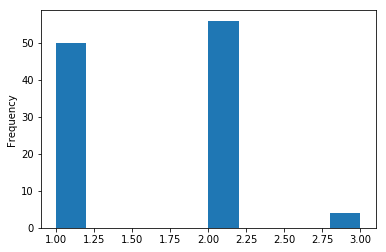

In [46]:
#diagrama de frecuencias y ver los resultados de cadda uno
clasificacion_global['Real Madrid'].plot.hist()

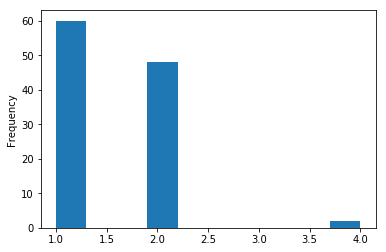

In [47]:
clasificacion_global['FC Barcelona'].plot.hist()

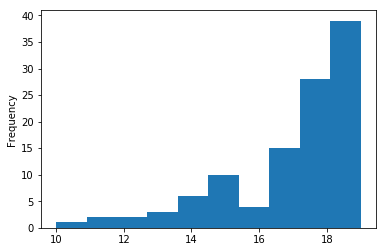

In [48]:
clasificacion_global['Rayo Vallecano'].plot.hist()

Las distribuciones de Madrid y Barcelona se pueden considerar Pareto, con alto porcentaje de las observaciones entre el primer y segundo puesto. 
El Valladolid, en cambio, se puede considerar como una distribución exponencial o de Poisson. 

## Reflexiones

* ¿Qué información se te ocurre que puede ser interesante incorporar en esta simulación?
* ¿Puede el método de montecarlo ayudarnos a ganar una quiniela?

Se podría añadir muchas otras variables al estudio como los detalles de todos los partidos de las temporadas más recientes. El factor tiempo es importante y de alguna manera se podría ponderar para usar los resultados más recientes.

Si se realiza un estudio de variables a tener en cuenta con cierta certeza, las simulaciones de Montecarlo servirían para predecir le número de muestras y un evento determinado para ciertos casos en quinielas o sucesos.